In [1]:
import os
import pandas as pd

# Specify the path to the folder containing the CSV files
folder_path = "generated_move1"

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Read each CSV file and store them in a list of DataFrames
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
df_move1 = pd.concat(dfs, ignore_index=True)


In [2]:
df_move1.head()

,sentence,move_sub_move,confidence
0,Smith's research fails to consider the recent ...,1.0,0.8
1,"Research on the topic remains scarce, leaving ...",1.1,0.9
2,Unclear methodologies hinder the understanding...,1.2,0.75
3,Additional research is necessary to establish ...,1.3,0.85
4,Smith's research does not account for the long...,1.0,0.9


In [3]:
df_move1.shape

(58749, 3)

In [4]:
# rename move_sub_move to  move_sub_move_gemini
df_move1.rename(columns={'move_sub_move':'move_sub_move_gemini'}, inplace=True)

In [5]:

df_move1.drop_duplicates(inplace=True,subset=['sentence'])
df_move1.shape

(53907, 3)

# move 2

In [17]:

import os
import pandas as pd

# Specify the path to the folder containing the CSV files
folder_path = "generated_move2"

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Read each CSV file and store them in a list of DataFrames
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
df_move2 = pd.concat(dfs, ignore_index=True)
df_move2.rename(columns={'move_sub_move':'move_sub_move_gemini'}, inplace=True)
df_move2.drop_duplicates(inplace=True,subset=['sentence'])
df_move2.head()


,sentence,move_sub_move_gemini,confidence
0,This research aims to uncover the relationship...,2.0,0.9
1,We hypothesize that there is a positive correl...,2.1,0.9
2,Our findings suggest that university students ...,2.2,0.9
3,This research contributes to the understanding...,2.3,0.8
4,The paper is organized into four sections. The...,2.4,0.8


In [18]:
df_move2.shape

(47954, 3)

# move 0

In [19]:


import os
import pandas as pd

# Specify the path to the folder containing the CSV files
folder_path = "generated_move0"

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Read each CSV file and store them in a list of DataFrames
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
df_move0 = pd.concat(dfs, ignore_index=True)
df_move0.rename(columns={'move_sub_move':'move_sub_move_gemini'}, inplace=True)
df_move0.drop_duplicates(inplace=True,subset=['sentence'])
df_move0.head()


,sentence,move_sub_move_gemini,confidence
0,A compelling body of evidence indicates that a...,0.0,0.7
1,Numerous studies have explored the application...,0.1,0.8
2,Evidence suggests that X is among the most imp...,0.0,0.7
3,Extensive research has shown …,0.1,0.8
4,Extensive research has shown that early childh...,0.1,0.8


In [20]:
df_move0.shape

(46437, 3)

In [21]:
import pandas as pd

df = pd.read_csv('aggregated_data.csv')


/tmp/ipykernel_858298/899489181.py:3: DtypeWarning: Columns (0,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('aggregated_data.csv')


In [22]:
df[df['is_processed']].shape

(41054, 10)

In [23]:


processed = df[df['is_processed']]

processed.dropna(inplace=True, subset=['sentence','move_sub_move_gemini'])
processed['move_sub_move_gemini'].value_counts()

/tmp/ipykernel_858298/35979198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed.dropna(inplace=True, subset=['sentence','move_sub_move_gemini'])


move_sub_move_gemini
-1                                                                                                                30596
0.1                                                                                                                2457
0.0                                                                                                                2389
2.0                                                                                                                2309
1.1                                                                                                                 989
2.2                                                                                                                 555
2.3                                                                                                                 455
1.0                                                                                                                 443
2.4                

In [36]:

processed = pd.concat([processed, df_move1,df_move2,df_move0], ignore_index=True)

In [24]:
# delete 1.2, outlier 
processed = processed[processed['move_sub_move_gemini'] != '1.2,']

processed = processed[processed['move_sub_move_gemini'] != 'one of this values : 0.0, 0.1, 1.0, 1.1, 1.2, 1.3, 2.0, 2.1, 2.2, 2.3, 2.4 or -1']

processed = processed[processed['move_sub_move_gemini'] != 'Move 2: Occupying the Niche > Move 2.0: Outline your purpose (s) and state the nature of your research']
processed = processed[processed['move_sub_move_gemini'] != 'Move 0: Establishing a Research Territory, Sub move 0.1: Introduce and review previous research in the field']
processed = processed[processed['move_sub_move_gemini'] != 'none']
processed = processed[processed['move_sub_move_gemini'] != '0.0, 0.1']
processed = processed[processed['move_sub_move_gemini'] != 'other']
processed = processed[processed['move_sub_move_gemini'] != 'Move 2: Occupying the Niche']
processed = processed[processed['move_sub_move_gemini'] != 'none of the above']
processed = processed[processed['move_sub_move_gemini'] != 'outlier']
processed = processed[processed['move_sub_move_gemini'] != '2.0.']
processed = processed[processed['move_sub_move_gemini'] != '-1 - Outlier']
processed = processed[processed['move_sub_move_gemini'] != 'move -1']
processed = processed[processed['move_sub_move_gemini'] != '-1,']
processed = processed[processed['move_sub_move_gemini'] != '1.0.']
processed = processed[processed['move_sub_move_gemini'] != 'Claim something is wrong with the previous research']
processed = processed[processed['move_sub_move_gemini'] != 'Move 1: Establishing a Niche']
# Move 1: Establishing a NicheMove 1: Establishing a Niche

#Move 2: Occupying the Niche > Move 2.0: Outline your purpose (s) and state the nature of your research 
processed['move_sub_move_gemini'].isna().sum()
processed.dropna(subset=['move_sub_move_gemini','sentence'], inplace=True)

In [25]:
# delete 1.2, outlier 
processed = processed[processed['move_sub_move_gemini'] != '1.2,']

processed = processed[processed['move_sub_move_gemini'] != 'one of this values : 0.0, 0.1, 1.0, 1.1, 1.2, 1.3, 2.0, 2.1, 2.2, 2.3, 2.4 or -1']

processed = processed[processed['move_sub_move_gemini'] != 'Move 2: Occupying the Niche > Move 2.0: Outline your purpose (s) and state the nature of your research']
processed = processed[processed['move_sub_move_gemini'] != 'Move 0: Establishing a Research Territory, Sub move 0.1: Introduce and review previous research in the field']
processed = processed[processed['move_sub_move_gemini'] != 'none']
processed = processed[processed['move_sub_move_gemini'] != '0.0, 0.1']
processed = processed[processed['move_sub_move_gemini'] != 'other']
processed = processed[processed['move_sub_move_gemini'] != 'Move 2: Occupying the Niche']
processed = processed[processed['move_sub_move_gemini'] != 'none of the above']
processed = processed[processed['move_sub_move_gemini'] != 'outlier']
processed = processed[processed['move_sub_move_gemini'] != '2.0.']
processed = processed[processed['move_sub_move_gemini'] != '-1 - Outlier']
processed = processed[processed['move_sub_move_gemini'] != 'move -1']
processed = processed[processed['move_sub_move_gemini'] != '-1,']
processed = processed[processed['move_sub_move_gemini'] != '1.0.']
processed = processed[processed['move_sub_move_gemini'] != '1.0.']
processed = processed[processed['move_sub_move_gemini'] != 'Move 1: Establishing a Niche']
processed = processed[processed['move_sub_move_gemini'] != 'Highlight a gap in the field']
processed = processed[processed['move_sub_move_gemini'] != 'Raise a question where research in field is unclear']
processed = processed[processed['move_sub_move_gemini'] != 'Extend prior research to add more information on the topic']
processed = processed[processed['move_sub_move_gemini'] != '0/0.1']
processed = processed[processed['move_sub_move_gemini'] != 'Move 2: Occupying the Niche Submove 2.0 Outline your purpose (s) and state the nature of your research']
processed = processed[processed['move_sub_move_gemini'] != 'Move 0: Establishing a Research Territory \n Sub Move 0.1: Introduce and review previous research in the field']
processed = processed[processed['move_sub_move_gemini'] != 'Move 1: Establishing a Niche > 1.1: Highlight a gap in the field']
processed = processed[processed['move_sub_move_gemini'] != 'sentence is an outlier and does not belong to any of the moves above']
processed = processed[processed['move_sub_move_gemini'] != '1,1']
processed = processed[processed['move_sub_move_gemini'] != '1.2.']
processed = processed[processed['move_sub_move_gemini'] != '2.1.']
processed = processed[processed['move_sub_move_gemini'] != '2.2.']
processed = processed[processed['move_sub_move_gemini'] != '2.3.']
processed = processed[processed['move_sub_move_gemini'] != '2.4.']
# Move 1: Establishing a NicheMove 1: Establishing a Niche

#Move 2: Occupying the Niche > Move 2.0: Outline your purpose (s) and state the nature of your research 
processed['move_sub_move_gemini'].isna().sum()
processed.dropna(subset=['move_sub_move_gemini','sentence'], inplace=True)

In [26]:
# map non of the above value to -1
processed['move_sub_move_gemini'] = processed['move_sub_move_gemini'].apply(lambda x: -1.0 if x == 'None of the above' or x == '- 1' or x == ' -1' else float(x))

processed = processed[processed['move_sub_move_gemini'] != 1.4]

In [96]:
# drop 1.4 row

In [37]:

processed['move_sub_move_gemini'].apply(type).value_counts()

move_sub_move_gemini
<class 'float'>    165040
<class 'str'>       22531
Name: count, dtype: int64

In [38]:
processed['move_sub_move_gemini'].value_counts()

move_sub_move_gemini
-1.0        30599
 0.1        26143
 0.0        25140
 2.0         7848
 2.3         5841
 2.2         5780
 2.1         5436
 2.0         4850
 2.1         4733
 2.3         4717
 2.2         4567
 2.4         4390
 2.4         3658
 1.1          989
 1.0          444
 1.3          182
 1.2           94
 2.0.           1
 2.1.           1
 2.2.           1
 2.3.           1
 2.4.           1
 2.0/2.1        1
Name: count, dtype: int64

In [39]:

processed['move_sub_move_gemini'].apply(int).value_counts()

ValueError: cannot convert float NaN to integer

In [30]:
move_minus_1_examples = processed[processed['move_sub_move_gemini'] == -1].head(5)
move_minus_1_examples.head()

,Unnamed: 0,introduction,sentence,move,sub_move,move_sub_move,is_processed,move_sub_move_gemini,short_explanation,confidence
0,0,We evaluate our approach of specializing docum...,We evaluate our approach of specializing docum...,2.0,0.0,2.0,True,-1.0,The sentence does not fit into any of the sub ...,1
1,1,We evaluate our approach of specializing docum...,Research papers in Papers with Code are labele...,0.0,1.0,0.1,True,-1.0,The sentence is an outlier because it does not...,1.0
2,2,We evaluate our approach of specializing docum...,We use these labels as aspects to specialize t...,1.0,0.0,1.0,True,-1.0,The sentence does not belong to any of the mov...,1.0
3,3,We evaluate our approach of specializing docum...,"As specialization methods, we rely on existing...",1.0,1.0,1.1,True,-1.0,The sentence describes the method and techniqu...,1.0
5,5,"In summary, our contributions are:\n(1) We pro...","In summary, our contributions are:",2.0,0.0,2.0,True,-1.0,Sentence is an outlier because it does not fit...,1.0


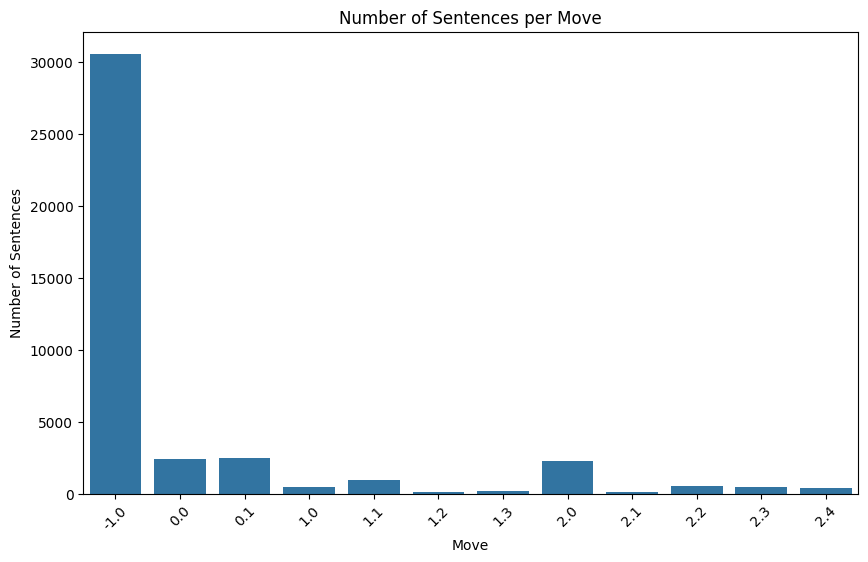

In [31]:

# graph analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of sentences per move
move_counts = processed['move_sub_move_gemini'].value_counts()

# Plot the number of sentences per move
plt.figure(figsize=(10, 6))
sns.barplot(x=move_counts.index, y=move_counts.values)
plt.title('Number of Sentences per Move')
plt.xlabel('Move')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45)
plt.show()

In [32]:
# filter outliers 
outliers_filtered = processed[processed['move_sub_move_gemini'] != -1]

In [31]:
outliers_filtered['move_sub_move_gemini'].value_counts()

move_sub_move_gemini
0.1    21367
0.0    20255
2.0    10157
1.1    10062
1.0    10015
1.3     9358
1.2     8936
2.3     8121
2.2     7987
2.1     7715
2.4     6292
Name: count, dtype: int64

In [34]:
outliers_filtered['move_sub_move_gemini'].apply(int).value_counts()


move_sub_move_gemini
0    4847
2    3872
1    1708
Name: count, dtype: int64

[-1  1  2  0]


/home/sidali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.78      0.94      0.85      6085
           0       0.95      0.86      0.90      8374
           1       0.96      0.92      0.94      7656
           2       0.95      0.92      0.94      8058

    accuracy                           0.91     30173
   macro avg       0.91      0.91      0.91     30173
weighted avg       0.92      0.91      0.91     30173



/tmp/ipykernel_682659/2919851513.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


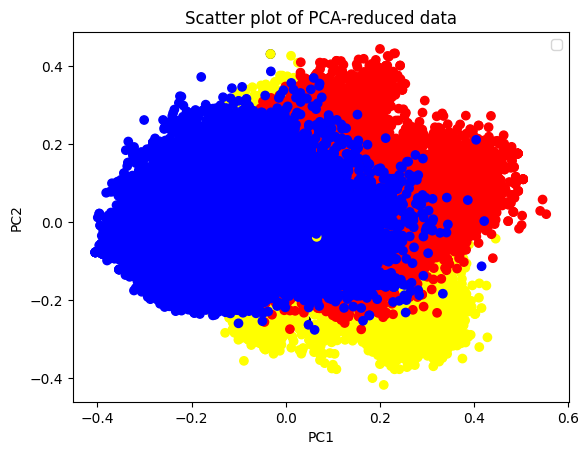

In [33]:


# vectorize the sentence column using tf_ids
from sklearn.feature_extraction.text import TfidfVectorizer
# import PCA
from sklearn.decomposition import PCA

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the vectorizer on the sentence column
tfidf_matrix = vectorizer.fit_transform(processed['sentence'])
# create a random forest classifier to classify moves
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from   sklearn.preprocessing import LabelEncoder

# Create the features matrix (X) and target vector (y)
X = tfidf_matrix
y = processed['move_sub_move_gemini'].apply(int)
print(y.unique())

encoder = LabelEncoder() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create a logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report   
from sklearn.utils.class_weight import compute_class_weight

import numpy as np

# Create a LogisticRegression object
lr = LogisticRegression(n_jobs=8,class_weight='balanced',max_iter=10000,solver='liblinear',C=0.2,penalty='l2')


# Train the model

lr.fit(X_train, y_train)

# Predict the target vector
y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

# apply pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.array(X.toarray()))

# prompt: draw a scatter plot of X_reduced color the label depending on the move ( 0 ,1 ,2)

import matplotlib.pyplot as plt

color_map = {
    0: 'blue',
    1: 'yellow',
    2:'red',
    -1:'black'
}



colors = [  color_map[label] for label in y]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
#draw the cluster points

plt.legend()
plt.title('Scatter plot of PCA-reduced data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



[1 2 0]


/home/sidali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8220
           1       0.96      0.94      0.95      7727
           2       0.95      0.97      0.96      8106

    accuracy                           0.95     24053
   macro avg       0.95      0.95      0.95     24053
weighted avg       0.95      0.95      0.95     24053



/tmp/ipykernel_682659/3851666527.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


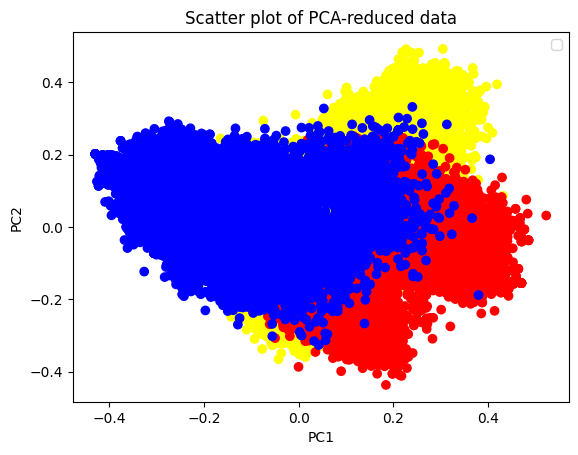

In [34]:


# vectorize the sentence column using tf_ids
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the vectorizer on the sentence column
tfidf_matrix = vectorizer.fit_transform(outliers_filtered['sentence'])
# create a random forest classifier to classify moves
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from   sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

# Create the features matrix (X) and target vector (y)
X = tfidf_matrix
y = outliers_filtered['move_sub_move_gemini'].apply(int)
print(y.unique())

encoder = LabelEncoder() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create a logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report   
from sklearn.utils.class_weight import compute_class_weight

import numpy as np

# Create a LogisticRegression object
lr = LogisticRegression(n_jobs=8,class_weight='balanced',max_iter=10000,solver='liblinear',C=0.2,penalty='l2')


# Train the model

lr.fit(X_train, y_train)

# Predict the target vector
y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

# apply pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.array(X.toarray()))

# prompt: draw a scatter plot of X_reduced color the label depending on the move ( 0 ,1 ,2)

import matplotlib.pyplot as plt

color_map = {
    0: 'blue',
    1: 'yellow',
    2:'red'
}



colors = [  color_map[label] for label in y]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
#draw the cluster points

plt.legend()
plt.title('Scatter plot of PCA-reduced data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



# Move 0 : sub moves study


In [35]:
move_0_sub_moves_df = outliers_filtered[outliers_filtered['move_sub_move_gemini'].apply(int) == 0]

move_0_sub_moves_df = move_0_sub_moves_df.sort_values('move_sub_move_gemini')
move_0_sub_moves_df.shape


(41622, 10)

In [36]:
move_0_sub_moves_df.head()

,Unnamed: 0,introduction,sentence,move,sub_move,move_sub_move,is_processed,move_sub_move_gemini,short_explanation,confidence
130081,NaN,NaN,A recent study provides compelling evidence th...,NaN,NaN,NaN,NaN,0.0,NaN,0.7
126150,NaN,NaN,Available data indicates the need for further ...,NaN,NaN,NaN,NaN,0.0,NaN,0.7
142081,NaN,NaN,The rising cost of healthcare has become a pre...,NaN,NaN,NaN,NaN,0.0,NaN,0.8
126148,NaN,NaN,Recent studies have highlighted the significan...,NaN,NaN,NaN,NaN,0.0,NaN,0.8
142082,NaN,NaN,The exploration of space remains an important ...,NaN,NaN,NaN,NaN,0.0,NaN,0.7


[0.  0.1]
[0.  0.1]
[0 1]


/home/sidali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4088
           1       0.87      0.87      0.87      4237

    accuracy                           0.86      8325
   macro avg       0.86      0.86      0.86      8325
weighted avg       0.86      0.86      0.86      8325



/tmp/ipykernel_682659/3448676084.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


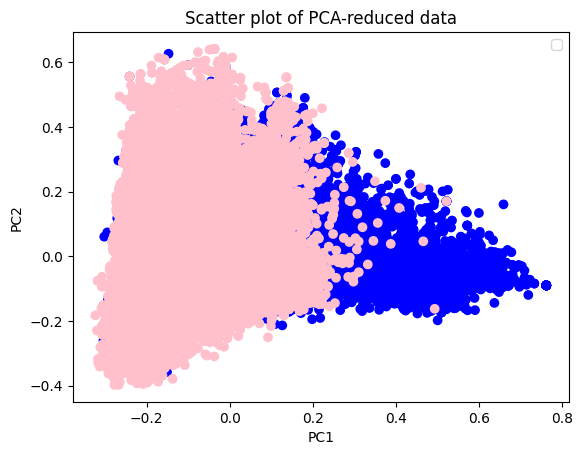

In [37]:

# vectorize the sentence column using tf_ids
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the vectorizer on the sentence column
tfidf_matrix = vectorizer.fit_transform(move_0_sub_moves_df['sentence'])
# create a random forest classifier to classify moves
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from   sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

# Create the features matrix (X) and target vector (y)
X = tfidf_matrix
y = move_0_sub_moves_df['move_sub_move_gemini']
print(y.unique())

encoder = LabelEncoder() 
print(y.unique())
y = encoder.fit_transform(y)
print(np.unique(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create a logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report   
from sklearn.utils.class_weight import compute_class_weight

import numpy as np

# Create a LogisticRegression object
lr = LogisticRegression(n_jobs=8,class_weight='balanced',max_iter=10000,solver='liblinear',C=0.2,penalty='l2')


# Train the model

lr.fit(X_train, y_train)

# Predict the target vector
y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.array(X.toarray()))

# prompt: draw a scatter plot of X_reduced color the label depending on the move ( 0 ,1 ,2)

import matplotlib.pyplot as plt

color_map = {
    0: 'blue',
    1: 'pink',
}



colors = [  color_map[label] for label in y]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
#draw the cluster points

plt.legend()
plt.title('Scatter plot of PCA-reduced data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()




# move 2: sub moves study


In [38]:

move_2_sub_moves_df = outliers_filtered[outliers_filtered['move_sub_move_gemini'].apply(int) == 2]
# order by sub move
move_2_sub_moves_df = move_2_sub_moves_df.sort_values('move_sub_move_gemini')

move_2_sub_moves_df.shape


(40272, 10)

[2.  2.1 2.2 2.3 2.4]
[2.  2.1 2.2 2.3 2.4]
[0 1 2 3 4]


/home/sidali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2074
           1       0.98      0.93      0.96      1519
           2       0.90      0.92      0.91      1607
           3       0.92      0.89      0.90      1582
           4       0.99      0.98      0.98      1273

    accuracy                           0.93      8055
   macro avg       0.94      0.93      0.94      8055
weighted avg       0.93      0.93      0.93      8055



/tmp/ipykernel_682659/4082738250.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


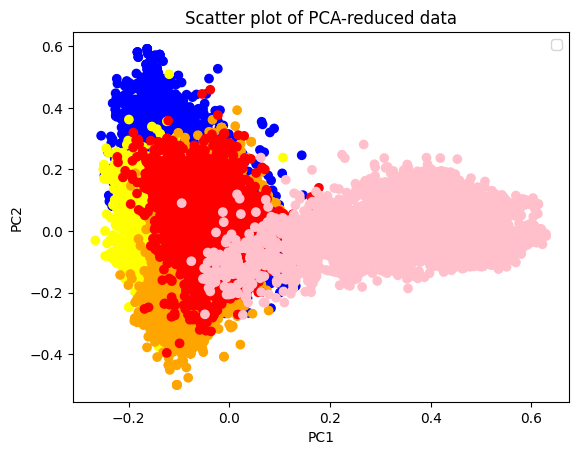

In [39]:

# vectorize the sentence column using tf_ids
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the vectorizer on the sentence column
tfidf_matrix = vectorizer.fit_transform(move_2_sub_moves_df['sentence'])
# create a random forest classifier to classify moves
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from   sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

# Create the features matrix (X) and target vector (y)
X = tfidf_matrix
y = move_2_sub_moves_df['move_sub_move_gemini']
print(y.unique())

encoder = LabelEncoder() 
print(y.unique())
y = encoder.fit_transform(y)
print(np.unique(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create a logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report   
from sklearn.utils.class_weight import compute_class_weight

import numpy as np

# Create a LogisticRegression object
lr = LogisticRegression(n_jobs=8,class_weight='balanced',max_iter=10000,solver='liblinear',C=0.2,penalty='l2')


# Train the model

lr.fit(X_train, y_train)

# Predict the target vector
y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.array(X.toarray()))

# prompt: draw a scatter plot of X_reduced color the label depending on the move ( 0 ,1 ,2)

import matplotlib.pyplot as plt

color_map = {
    0: 'blue',
    1: 'yellow',
    2: 'orange',
    3: 'red',
    4: 'pink',
}



colors = [  color_map[label] for label in y]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
#draw the cluster points

plt.legend()
plt.title('Scatter plot of PCA-reduced data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()




# move 1: sub moves

In [40]:

move_1_sub_moves_df = outliers_filtered[outliers_filtered['move_sub_move_gemini'].apply(int) == 1]
# order by sub move
move_1_sub_moves_df = move_1_sub_moves_df.sort_values('move_sub_move_gemini')

move_1_sub_moves_df.shape


(38371, 10)

[1.  1.1 1.2 1.3]
[1.  1.1 1.2 1.3]
[0 1 2 3]


/home/sidali/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2027
           1       0.86      0.90      0.88      1971
           2       0.92      0.90      0.91      1839
           3       0.95      0.93      0.94      1838

    accuracy                           0.92      7675
   macro avg       0.92      0.92      0.92      7675
weighted avg       0.92      0.92      0.92      7675



/tmp/ipykernel_682659/1111649685.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


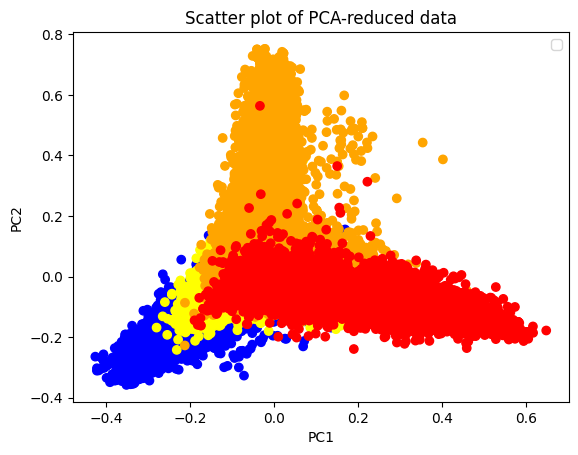

In [41]:

# vectorize the sentence column using tf_ids
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the vectorizer on the sentence column
tfidf_matrix = vectorizer.fit_transform(move_1_sub_moves_df['sentence'])
# create a random forest classifier to classify moves
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from   sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

# Create the features matrix (X) and target vector (y)
X = tfidf_matrix
y = move_1_sub_moves_df['move_sub_move_gemini']
print(y.unique())

encoder = LabelEncoder() 
print(y.unique())
y = encoder.fit_transform(y)
print(np.unique(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create a logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report   
from sklearn.utils.class_weight import compute_class_weight

import numpy as np

# Create a LogisticRegression object
lr = LogisticRegression(n_jobs=8,class_weight='balanced',max_iter=10000,solver='liblinear',C=0.2,penalty='l2')


# Train the model

lr.fit(X_train, y_train)

# Predict the target vector
y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.array(X.toarray()))

# prompt: draw a scatter plot of X_reduced color the label depending on the move ( 0 ,1 ,2)

import matplotlib.pyplot as plt

color_map = {
    0: 'blue',
    1: 'yellow',
    2: 'orange',
    3: 'red',
}



colors = [  color_map[label] for label in y]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
#draw the cluster points

plt.legend()
plt.title('Scatter plot of PCA-reduced data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()




In [42]:
import re
choosen_df = processed 




def detect_latex_sections(text):
    section_pattern = r'\\section\{(.+?)\}'
    sections = re.findall(section_pattern, text)
    return sections

def detect_latex_subsections(text):
    subsection_pattern = r'\\subsection\{(.+?)\}'
    subsections = re.findall(subsection_pattern, text)
    return subsections

def detect_latex_figures(text):
    figure_pattern = r'\\begin\{figure\}.*?\\end\{figure\}'
    figures = re.findall(figure_pattern, text, re.DOTALL)
    return figures

def detect_latex_tables(text):
    table_pattern = r'\\begin\{table\}.*?\\end\{table\}|\\begin\{tabular\}.*?\\end\{tabular\}'
    tables = re.findall(table_pattern, text, re.DOTALL)
    return tables

def detect_latex_equations(text):
    equation_pattern = r'\$.*?\$|\\\[.*?\\\]|\\\(.*?\\\)'  
    equations = re.findall(equation_pattern, text, re.DOTALL)
    return equations

def detect_latex_citations(text):
    citation_pattern = r'\\cite(?:[a-zA-Z*]*)\{(.*?)\}'
    citation_pattern_2 = r'\[\d+\]'

    citations = re.findall(citation_pattern, text)
    citations2 = re.findall(citation_pattern_2, text)
    return citations + citations2
def detect_non_natural_language(text):
    # Define a single regex pattern to detect common non-natural language content in LaTeX
    non_language_pattern = r'(\\[^a-zA-Z\s]+(?:\{[^{}]*\})?)'

    # Search for the pattern in the text
    matches = re.findall(non_language_pattern, text)

    # Return the matches found
    return matches


# Apply each detection function to the 'sentence' column
choosen_df['sections'] = choosen_df['sentence'].apply(lambda x: detect_latex_sections(x))
choosen_df['subsections'] = choosen_df['sentence'].apply(lambda x: detect_latex_subsections(x))
choosen_df['figures'] = choosen_df['sentence'].apply(lambda x: detect_latex_figures(x))
choosen_df['tables'] = choosen_df['sentence'].apply(lambda x: detect_latex_tables(x))
choosen_df['equations'] = choosen_df['sentence'].apply(lambda x: detect_latex_equations(x))

choosen_df['citations'] = choosen_df['sentence'].apply(lambda x: detect_latex_citations(x))
choosen_df['non_language'] = choosen_df['sentence'].apply(lambda x: detect_non_natural_language(x))

# Count statistics
stats = {
    'sections': choosen_df['sections'].apply(len).sum(),
    'subsections': choosen_df['subsections'].apply(len).sum(),
    'figures': choosen_df['figures'].apply(len).sum(),
    'tables': choosen_df['tables'].apply(len).sum(),
    'equations': choosen_df['equations'].apply(len).sum(),
    'citations': choosen_df['citations'].apply(len).sum(),
    'non_language': choosen_df['non_language'].apply(len).sum()
}

print("Statistics:")
for key, value in stats.items():
    print(f"{key.capitalize()}: {value}")

Statistics:
Sections: 0
Subsections: 0
Figures: 0
Tables: 0
Equations: 1505
Citations: 22031
Non_language: 2918


In [43]:
non_natural_language_df = choosen_df[choosen_df['non_language'].apply(len) > 0]

# print some sentences with non natural language
for i in range(5):
    print(f"Sentence {i+1}: {non_natural_language_df['sentence'].iloc[i]}")
    print(f"Move {i+1}: {non_natural_language_df['move_sub_move_gemini'].iloc[i]}")
    print(f"Non-natural language: {non_natural_language_df['non_language'].iloc[i]}")
    print()

Sentence 1: As it is well known, indeed, classical propositional logic provided the first example of an \(\textsf {NP}\) -complete problem [1].
Move 1: -1.0
Non-natural language: ['\\(\\', '\\)']

Sentence 2: Moreover, formal systems for classical and intuitionistic propositional logic correspond to type systems for \(\lambda \) -calculi and related formalisms [2]}, [3].
Move 2: -1.0
Non-natural language: ['\\(\\', '\\)']

Sentence 3: These lines of research evolved in several directions, resulting in
active sub-areas of computer science, in which variations of
propositional logic have been put in relation with complexity classes
other than \(\textsf {P}\)  and \(\textsf {NP}\)  or with type systems other than
simple types.
Move 3: -1.0
Non-natural language: ['\\(\\', '\\)', '\\(\\', '\\)']

Sentence 4: At every time \(t\) , the agent learns for itself the optimal control policy \(\pi (s_t|a_t)\)  through trial and error by selecting control actions \(a_t\)  based on its perceived stat

In [44]:
sentences_with_citations = choosen_df[choosen_df['citations'].apply(len) > 0]

# Print some sentences with citations
for i in range(5):
    print(f"Sentence {i+1}: {sentences_with_citations['sentence'].iloc[i]}")
    print(f"Move {i+1}: {sentences_with_citations['move_sub_move_gemini'].iloc[i]}")
    print(f" short citations: {sentences_with_citations['short_explanation'].iloc[i]}")
    print(f"Citations: {sentences_with_citations['citations'].iloc[i]}")
    print()


Sentence 1: As specialization methods, we rely on existing methods but apply them in a way diverging from their original purpose. Namely, we evaluate retrofitting [1]} and jointly learned embeddings from Transformer fine-tuning [2]}, [3]} and Siamese Transformers [4]}.
Move 1: -1.0
 short citations: The sentence describes the method and techniques used in the research, which does not correspond to any move in the IMRAD introduction structure.
Citations: ['[1]', '[2]', '[3]', '[4]']

Sentence 2: The specialized embeddings are compared against a pairwise multi-class document classification baseline and generic (non-specialized) embeddings from FastText word vectors [5]}, SciBERT [2]}, and SPECTER [3]}.
Move 2: 1.1
 short citations: The sentence highlights a gap in the field by comparing specialized embeddings against generic embeddings and baselines.
Citations: ['[5]', '[2]', '[3]']

Sentence 3: This is a valuable precursor for obfuscating the background to preserve privacy, given that p

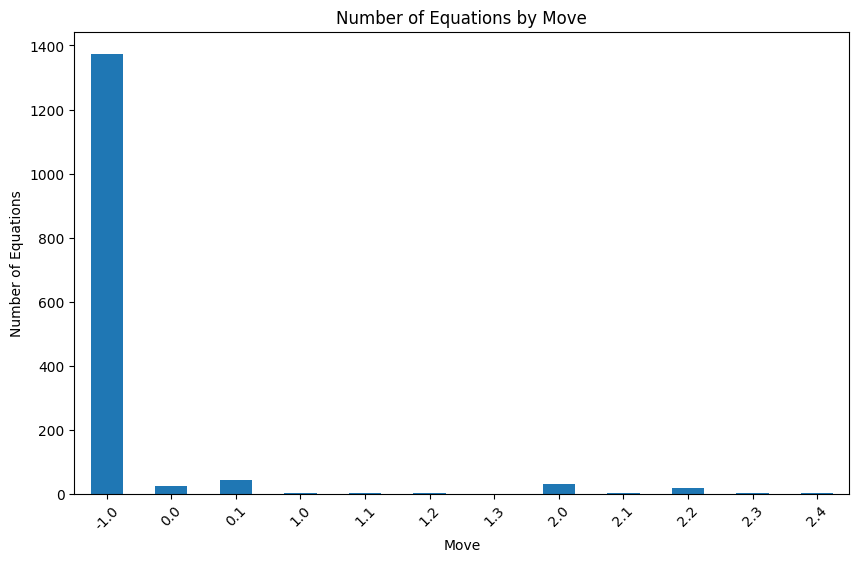

In [45]:
import matplotlib.pyplot as plt

# Group the dataframe by move and count the number of equations in each group
equation_counts = choosen_df.groupby('move_sub_move_gemini')['equations'].apply(lambda x: x.apply(len).sum())

# Plot the bar chart
plt.figure(figsize=(10, 6))
equation_counts.plot(kind='bar')
plt.title('Number of Equations by Move')
plt.xlabel('Move')
plt.ylabel('Number of Equations')
plt.xticks(rotation=45)
plt.show()


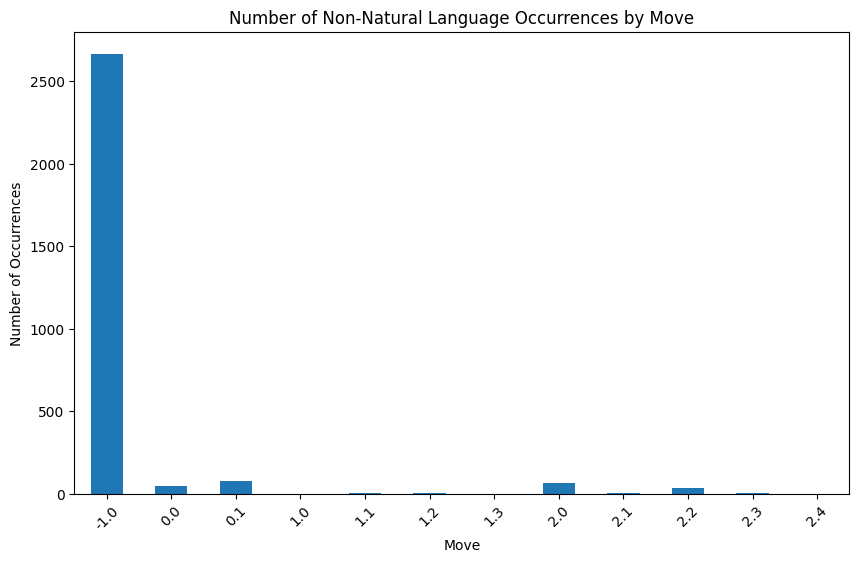

In [46]:
import matplotlib.pyplot as plt

# Group the dataframe by move and count the number of non-language occurrences in each group
non_language_counts = choosen_df.groupby('move_sub_move_gemini')['non_language'].apply(lambda x: x.apply(len).sum())

# Plot the bar chart
plt.figure(figsize=(10, 6))
non_language_counts.plot(kind='bar')
plt.title('Number of Non-Natural Language Occurrences by Move')
plt.xlabel('Move')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()


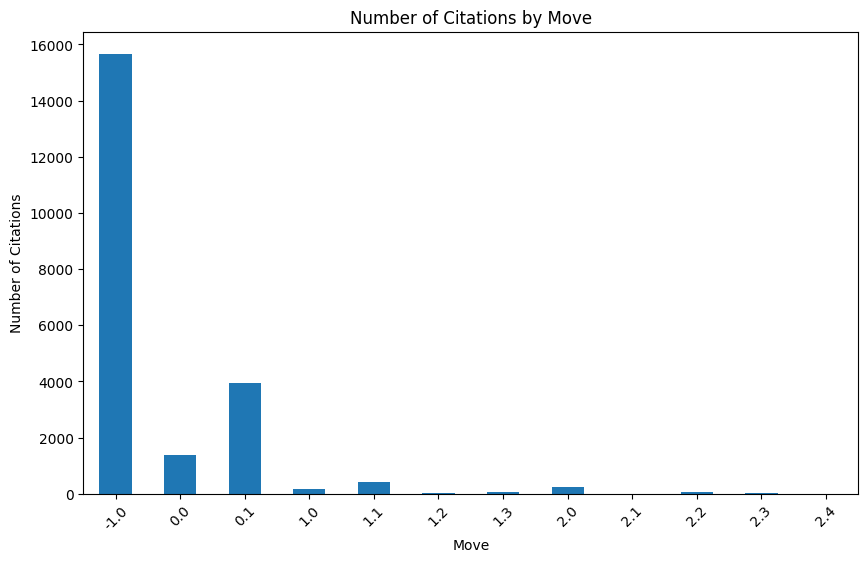

In [47]:
import matplotlib.pyplot as plt

# Group the dataframe by move and count the number of citations in each group
citation_counts = choosen_df.groupby('move_sub_move_gemini')['citations'].apply(lambda x: x.apply(len).sum())

# Plot the bar chart
plt.figure(figsize=(10, 6))
citation_counts.plot(kind='bar')
plt.title('Number of Citations by Move')
plt.xlabel('Move')
plt.ylabel('Number of Citations')
plt.xticks(rotation=45)
plt.show()


In [48]:
# create citation_count , equation_count, non_language_count columns
choosen_df['citation_count'] = choosen_df['citations'].apply(len)
choosen_df['equation_count'] = choosen_df['equations'].apply(len)
choosen_df['non_language_count'] = choosen_df['non_language'].apply(len)

In [49]:
filtered_df = choosen_df[choosen_df['move_sub_move_gemini'] != -1]


In [50]:
filtered_df['move_sub_move_gemini'].apply(int).value_counts()

move_sub_move_gemini
0    41622
2    40272
1    38371
Name: count, dtype: int64

In [51]:
import re
section_pattern = r'\\section\{(.+?)\}'
subsection_pattern = r'\\subsection\{(.+?)\}'
figure_pattern = r'\\begin\{figure\}.*?\\end\{figure\}'
table_pattern = r'\\begin\{table\}.*?\\end\{table\}|\\begin\{tabular\}.*?\\end\{tabular\}'
equation_pattern = r'\$.*?\$|\\\[.*?\\\]|\\\(.*?\\\)'
citation_pattern = r'\\cite(?:[a-zA-Z*]*)\{(.*?)\}'
citation_pattern_2 = r'\[\d+\]'
non_language_pattern = r'(\\[^a-zA-Z\s]+(?:\{[^{}]*\})?)'
percentage_pattern = r'(\d+\.\d+|\d+)%'
list_pattern = r'\\begin\{itemize\}.*?\\end\{itemize\}|\\begin\{enumerate\}.*?\\end\{enumerate\}'
bibliography_pattern = r'\\begin\{thebibliography\}.*?\\end\{thebibliography\}'
special_command_pattern = r'\\textbf\{.*?\}|\\emph\{.*?\}|\\underline\{.*?\}'
document_class_pattern = r'\\documentclass\[.*?\]\{.*?\}'
package_pattern = r'\\usepackage\[.*?\]\{.*?\}'

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=2000)


def clean_text(text):
    # Remove sections
    text = re.sub(section_pattern, ' ', text)
    # Remove subsections
    text = re.sub(subsection_pattern, ' ', text)
    # Remove figures
    text = re.sub(figure_pattern, ' ', text)
    # Remove tables
    text = re.sub(table_pattern, ' ', text)
    # Remove equations
    text = re.sub(equation_pattern, ' ', text)
    # Remove citations
    text = re.sub(citation_pattern, ' ', text)
    text = re.sub(citation_pattern_2, ' ', text)
    # Remove non-natural language
    text = re.sub(non_language_pattern, ' ', text)
    # Remove special commands
    text = re.sub(special_command_pattern, ' ', text)

    # normalize spaces
    text = re.sub(r'\s+', ' ', text)


        

    return text
# Fit and transform the vectorizer on the sentence column
tfidf_matrix = vectorizer.fit_transform( filtered_df['sentence'].apply(clean_text) )

# Create the features matrix (X) by concatenating the TF-IDF matrix with additional features

X = np.array( filtered_df[['citation_count', 'equation_count', 'non_language_count']])
print(X.shape)
# concatenate X with tfidf
X = np.concatenate((X, tfidf_matrix.toarray()), axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# Encode the target variable
encoder = LabelEncoder()
y = filtered_df['move_sub_move_gemini'].apply(int)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LogisticRegression object
lr = LogisticRegression(max_iter=10000)

# Train the model
lr.fit(X_train, y_train) 

# Predict the target vector
y_pred = lr.predict(X_test)


# Print the classification report
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# apply pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# prompt: draw a scatter plot of X_reduced color the label depending on the move ( 0 ,1 ,2)

import matplotlib.pyplot as plt

color_map = {
    0: 'blue',
    1: 'yellow',
    2:'red'
}



colors = [  color_map[label] for label in y]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
#draw the cluster points

plt.legend()
plt.title('Scatter plot of PCA-reduced data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


(120265, 3)


KeyboardInterrupt: 

<>:47: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:47: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?


              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3960
           1       0.95      0.94      0.94      4517
           2       0.95      0.97      0.96      4663

    accuracy                           0.94     13140
   macro avg       0.94      0.94      0.94     13140
weighted avg       0.94      0.94      0.94     13140



/tmp/ipykernel_953673/375024604.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


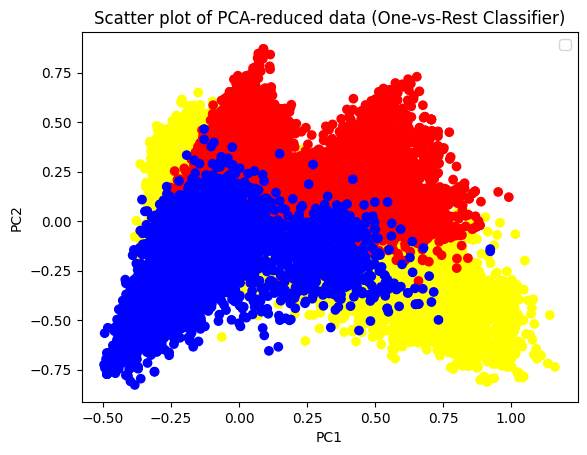

/tmp/ipykernel_953673/375024604.py:47: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  class_weight='balanced'("")
/tmp/ipykernel_953673/375024604.py:47: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  class_weight='balanced'("")
/tmp/ipykernel_953673/375024604.py:47: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  class_weight='balanced'("")


TypeError: 'str' object is not callable

In [118]:
from sklearn.multiclass import OneVsRestClassifier

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the vectorizer on the sentence column
tfidf_matrix = vectorizer.fit_transform(filtered_df['sentence'])

# Create the features matrix (X) by concatenating the TF-IDF matrix with additional features
X = np.array(filtered_df[['citation_count', 'equation_count', 'non_language_count']])
X = np.concatenate((X, tfidf_matrix.toarray()), axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Encode the target variable
encoder = LabelEncoder()
y = filtered_df['move_sub_move_gemini'].apply(int)

# Create a OneVsRestClassifier object with LogisticRegression as the base estimator
ovr = OneVsRestClassifier(LogisticRegression(max_iter=10000))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
ovr.fit(X_train, y_train)

# Predict the target vector
y_pred = ovr.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the PCA-reduced data, color-coded by the label
colors = [color_map[label] for label in y]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.legend()
plt.title('Scatter plot of PCA-reduced data (One-vs-Rest Classifier)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
,class_weight='balanced'

In [282]:
move_1_examples = filtered_df[filtered_df['move_sub_move_gemini'] == 2]
for i in range(5):
    print(f"Sentence {i+1}: {move_1_examples['sentence'].iloc[i]}")
    print(f"Move {i+1}: {move_1_examples['move_sub_move_gemini'].iloc[i]}")
    print()


Sentence 1: We empirically evaluate three specialization methods for three aspects on a newly constructed dataset based on Papers with Code for the use case of research paper recommendations.
Move 1: 2.0

Sentence 2: We study the problem of using partial annotations to train a Named Entity Recognition (NER) system.
Move 2: 2.0

Sentence 3: To address the above-mentioned challenge, we present Constrained Binary Learning (CBL) – a novel self-training based algorithm that focuses on iteratively identifying true negatives for the NER task while improving its learning.
Move 3: 2.0

Sentence 4: We show that a small amount of non-speaker annotation combined with our method can outperform previous methods.
Move 4: 2.0

Sentence 5: In this paper, we explore how large Bitcoin transactions from these whales affect the market volatility.
Move 5: 2.0

